# <center> PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO</center>
## <center> Complex Cepstrum Analysis</center>      

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.pyplot import axvline, axhline

In [2]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 MB 674.1 kB/s eta 0:00:0000:0100:03
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.0
    Uninstalling scipy-1.8.0:
      Successfully uninstalled scipy-1.8.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
import scipy
scipy.__version__

'1.8.1'

In [4]:
from scipy import signal

### Introducción

#### Descripción

Nuestro objetivo es aplicar el cesptrum complejo en la deconvolución de señales de voz para separar la excitación de la respuesta al impulso del tracto vocal. Para ello, estudiamos las características del cepstrum complejo de las secuencias involucradas en el modelo de producción de la voz: 
 - secuencias con transformada $\mathcal{Z}$ racional, 
 - y un tren de pulsos períodico.


### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-complex_cepstrum.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Parte 1 

#### Secuencia con transferencia racional

#### Parte 1.1 

Comenzamos planteando una secuencia con transferencia racional, del tipo

$$H(z) = \frac{(1-bz)(1-b^*z)}{(1-cz^{-1})(1-c^*z^{-1})},\;\;\;\textrm{con }|b|,|c|<1$$
lo que corresponde a
 - un par de ceros conjugados fuera el círculo unidad
 - un par de polos conjugados dentro del círculo unidad.

Si realizamos el cálculo analítico del cepstrum complejo usando la transformada $\mathcal{Z}$, obtenemos

$$\hat{h}[n]=\frac{2}{n}|b|^{-n}\cos(n\theta_b)u[-n+1] + \frac{2}{n}|c|^n\cos(n\theta_c)u[n-1], \quad \textrm{con} \;\; b=|b|e^{j\theta_b},\;\;c=|c|e^{j\theta_c}.$$

A continuación usamos la DFT para calcular el cepstrum complejo a partir de la transferencia racional.

El primer paso es plantear la transferencia racional y calcular los polos y ceros. Complete el siguiente código para hacerlo.

In [11]:
# magnitude and phase of the zero
mz = 0.97
phiz = 0.88 * np.pi
# magnitude and phase of the pole
mp = 0.97
phip = 0.12 * np.pi

# coefficients of the zero and pole
b = mz * np.exp(1j * phiz)
c = mp * np.exp(1j * phip)

# numerator and denominator coefficients
B = [mz**2, -2*mz*np.cos(phiz), 1]
A = [1, -2*mp*np.cos(phip), mp**2]

# get zero, pole and gain from transfer function
z, p, k = signal.tf2zpk(B, A)

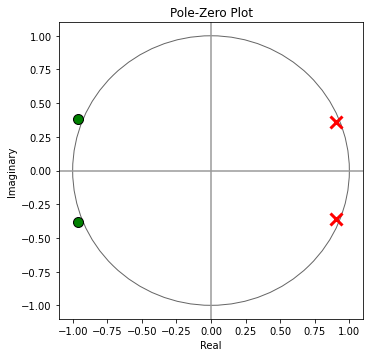

In [12]:
# plot zero pole diagram
plt.figure(figsize=(12, 12))
ax1 = plt.subplot(2, 1, 1)
ax = plt.subplot(2, 2, 1)
# unit circle and zero axes    
unit_circle = patches.Circle((0,0), radius=1, fill=False,
                             color='black', ls='solid', alpha=0.6)
ax.add_patch(unit_circle)
axvline(0, color='0.6')
axhline(0, color='0.6')

# plot the zeros and set marker properties    
t1 = plt.plot(z.real, z.imag, 'go', ms=10)
plt.setp(t1, markersize=10.0, markeredgewidth=1.0,
         markeredgecolor='k', markerfacecolor='g')
# plot the poles and set marker properties
t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
plt.setp(t2, markersize=12.0, markeredgewidth=3.0,
         markeredgecolor='r', markerfacecolor='r')

plt.title("Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary");

#### Parte 1.2 

El siguiente paso es calcular la respuesta en frecuencia a partir de los coeficientes de los polinomios numerador y denominador. 

Complete el siguiente código para calcular la respuesta en frecuencia, teniendo encuenta el desdoblamiento de la fase.

Responda las siguientes pregutas.
1. ¿Por qué se realiza el desdoblamiento de fase?
2. ¿Por qué se elimina el componente de fase lineal?

In [14]:
# compute the DFT taking into account the phase unwrapping

# number of DFT values
N = 512
# compute the transfer function
w, H = signal.freqz(B, A, worN=N, whole=True)

# magnitude 
magH = abs(H)
# phase
phaseH = np.angle(H)
# phase unwraped
phaseH_unw1 = np.unwrap(phaseH)

# === elimination of the linear phase component

# index of the phase value at pi
ind_pi = int(np.floor((N+1)/2))

# compute the linear phase factor
r = round(phaseH_unw1[ind_pi]/np.pi)

# compute the linear phase component
ph_lin_component = r * np.pi * np.arange(N) / ind_pi

# substract the linear phase component
phaseH_unw2 = phaseH_unw1 - ph_lin_component; 

# check that phase at 0 and pi frequency is 0
assert phaseH_unw2[0] == 0, "Phase value at zero is not 0"
assert phaseH_unw2[ind_pi] == 0, "Phase value at pi is not 0"

<Figure size 864x432 with 0 Axes>

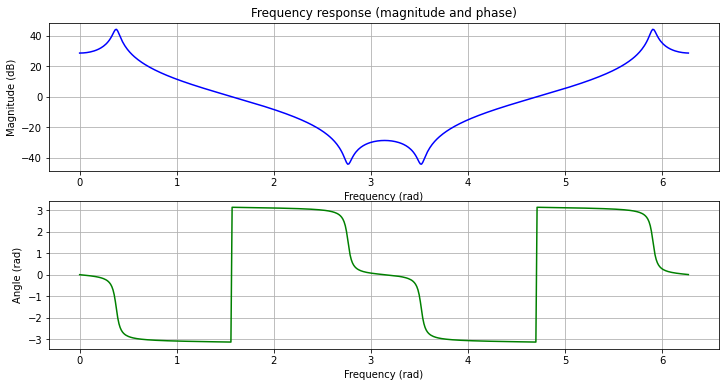

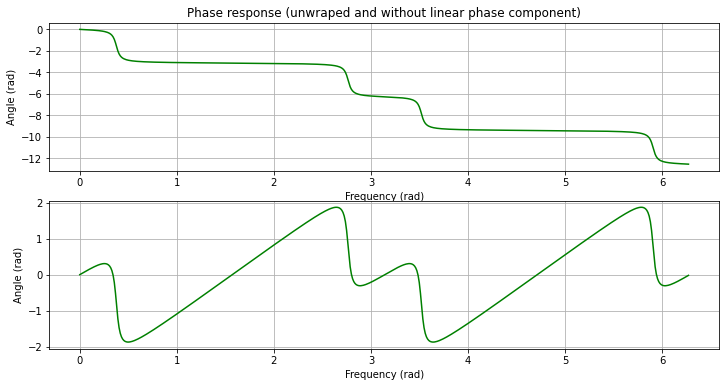

In [15]:
# plot magnitude and phase
plt.figure(figsize=(12,6))

# plot the frequency response
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Frequency response (magnitude and phase)')
ax1.plot(w, 20 * np.log10(magH), 'b')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_xlabel('Frequency (rad)')
ax1.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.plot(w, phaseH, 'g')
ax2.set_ylabel('Angle (rad)')
ax2.set_xlabel('Frequency (rad)')
ax2.grid()

plt.figure(figsize=(12,6))
ax3 = plt.subplot(2, 1, 1)
ax3.set_title('Phase response (unwraped and without linear phase component)')
ax3.plot(w, phaseH_unw1, 'g')
ax3.set_ylabel('Angle (rad)')
ax3.set_xlabel('Frequency (rad)')
ax3.grid()
ax4 = plt.subplot(2, 1, 2)
ax4.plot(w, phaseH_unw2, 'g')
ax4.set_ylabel('Angle (rad)')
ax4.set_xlabel('Frequency (rad)')
ax4.grid()

#### Parte 1.3 

A continuación, para calcular el cepstrum complejo resta tomar el logaritmo y aplicar la DFT inversa. 
Tenga presente que,

$$
\begin{split}
	 \hat{X}(e^{j\omega}) = \log X(e^{j\omega}) &= \log\left(|X(e^{j\omega})|e^{j\angle X(e^{j\omega})}\right)\\
	   &= \log\left(|X(e^{j\omega})|\right)+j\angle X(e^{j\omega}). 
\end{split}
$$

Complete el siguiente código, para implementar el logaritmo y la IDFT.

Responda las siguientes preguntas.

1. ¿Qué tipo de simetría tiene $\hat{X}(e^{j\omega})$?
2. ¿El cepstrum complejo $\hat{h}[n]$ es una secuencia real o compleja?

In [18]:
# compute the complex logarithm (using magH and phaseH)
logH = np.log(magH) + 1j*phaseH_unw2

# IDFT
hat_h = np.fft.ifft(logH).real

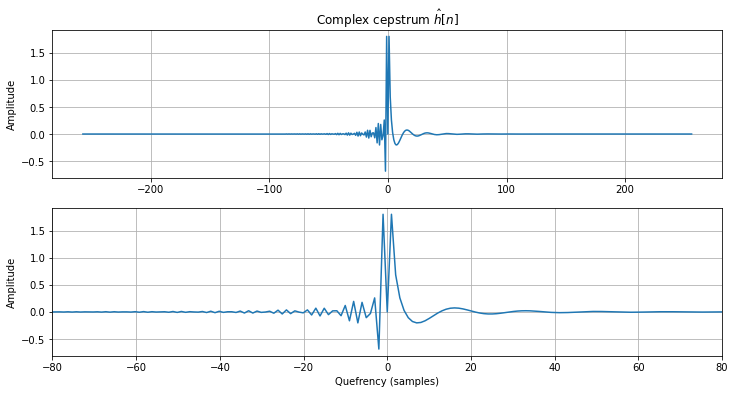

In [19]:
plt.figure(figsize=(12,6))
q = np.linspace(-N/2-1, N/2, N)
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Complex cepstrum $\hat{h}[n]$')
ax1.plot(q, np.fft.fftshift(hat_h))
ax1.set_ylabel('Amplitude')
ax1.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.plot(q, np.fft.fftshift(hat_h))
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Quefrency (samples)')
ax2.set_xlim([-80, 80])
ax2.grid()

### Parte 2 

#### Tren de pulsos periódico

#### Parte 2.1 

Comenzamos planteando un tren de pulsos periódico, del tipo

$$p[n]=\beta^n\sum_{k=0}^{\infty}\delta[n-kN],\;\textrm{con }|\beta|<1.$$

Si realizamos el cálculo analítico del cepstrum complejo usando la transformada $\mathcal{Z}$, obtenemos

$$\hat{p}[n]=\frac{N}{n}\beta^n\sum_{k=1}^{\infty}\delta[n-kN].$$

A continuación repetimos el mismo procedimiento de la parte anterior, para calcular el cepstrum complejo usando la DFT.

El primer paso es plantear el tren de pulsos periódico a partir de sus parámetros.

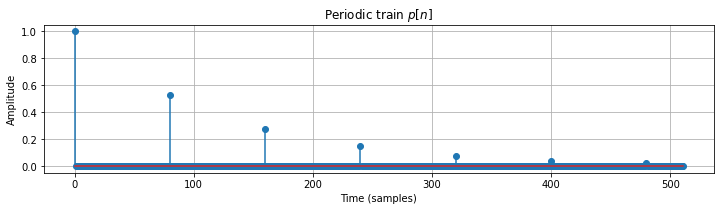

In [20]:
# number of samples (note this is not the period)
N = 512
# period in samples (the N value of the equation)
T = 80
# atenuation factor
beta = 0.992

# create the signal in time
p = np.zeros(N)
k = np.arange(1, np.floor((N-1)/T)+1)
kP = k * T
kP = kP.astype(int)
p[kP] = beta**kP
p[0] = 1

# plot periodic train
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.stem(p)
ax1.set_title('Periodic train $p[n]$')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (samples)')
ax1.grid()

#### Parte 2.2 

A continuación se calcula el cepstrum complejo del tren de pulsos periódico $p[n]$ usando la DFT. 

Analice el código y responda las siguientes preguntas. 

1. El cepstrum complejo $\hat{p}[n]$ es un tren de pulsos periódico ¿Cuál es su período?
2. El cepstrum complejo $\hat{p}[n]$ presenta un retardo. ¿Es consistente con la expresión analítica?
3. El factor de atenuación de $p[n]$ y $\hat{p}[n]$ es diferente. ¿Cuál es esa diferencia?

In [25]:
# DFT of the periodic impulse train
P = np.fft.fft(p)
# frequency values
w = np.fft.fftfreq(N)

In [27]:
# magnitude 
magP = abs(P)
# phase
phaseP = np.angle(P)
# phase unwraped
phaseP_unw1 = np.unwrap(phaseP)

# === elimination of the linear phase component

# index of the phase value at pi
ind_pi = int(np.floor((N+1)/2))

# compute the linear phase factor
r = round(phaseP_unw1[ind_pi]/np.pi)

# compute the linear phase component
ph_lin_component = r * np.pi * np.arange(N) / ind_pi

# substract the linear phase component
phaseP_unw2 = phaseP_unw1 - ph_lin_component; 

# check that phase at 0 and pi frequency is 0
assert phaseP_unw2[0] == 0, "Phase value at zero is not 0"
assert phaseP_unw2[ind_pi] == 0, "Phase value at pi is not 0"

In [28]:
# compute the complex logarithm (using magH and phaseH)
logP = np.log(magP) + 1j * phaseP_unw2

# IDFT
hat_p = np.real(np.fft.ifft(logP));

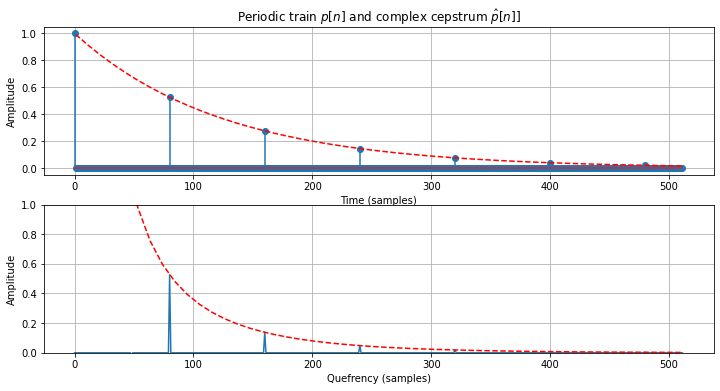

In [29]:
# amplitude envelope for periodic impulse train and its complex cepstrum
n = np.linspace(1, N)
b1 = beta**n
b2 = T * (beta**n) / n

plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.stem(p)
ax1.plot(n, b1, '--r')
ax1.set_title('Periodic train $p[n]$ and complex cepstrum $\hat{p}[n]]$')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (samples)')
ax1.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(hat_p)
ax2.plot(n, b2, '--r')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Quefrency (samples)')
ax2.set_ylim([0, 1])
ax2.grid();